<a href="https://colab.research.google.com/github/gbam-ds/FP-ML/blob/main/Porto_Seguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Porto Seguro
##Getting data

see <a href="{https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/40222}">this discusion</a> about the data: 

In [5]:
# Core
import seaborn as sns
#import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import graphviz
import pprint
import pandas as pd

# Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split

In [6]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
pd.set_option('display.max_columns', None)

#train dataset
train_path = '/content/drive/MyDrive/porto-seguro-safe-driver-prediction/train.csv'
train_df = pd.read_csv(train_path)
df = train_df.copy()
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [9]:
#O lançador do desafio nos informa que toda missing data da base está como -1

#Optamos por substituir -1 para NaN 
df = df.replace(-1,{})

In [ ]:
#!pip install missingno

In [ ]:
# Nullity or missing values by columns
#import missingno as msno
#msno.matrix(df=df.iloc[:,1:39], figsize=(20, 14), color=(0.42, 0.1, 0.05));

In [10]:
#id não ajuda, vou dropar
df.drop(['id'], axis=1, inplace=True)

#ps_car_03_cat e ps_car_05_cat tem muito nan, vou dropar
df.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1, inplace = True)

#ps_reg_03 e ps_car_14 são continuas, vou preencher com média
df['ps_reg_03'].fillna((df['ps_reg_03'].mean()), inplace=True)
df['ps_car_14'].fillna((df['ps_car_14'].mean()), inplace=True)


#ps_car_07_cat, vou preencher com moda
df['ps_car_07_cat'] = df['ps_car_07_cat'].fillna(df['ps_car_07_cat'].mode()[0])

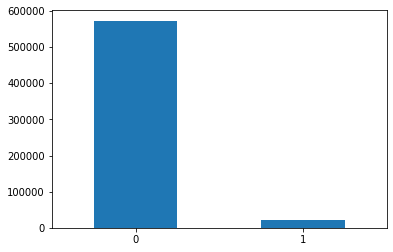

In [ ]:
#distribuição de target
df["target"].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 360);

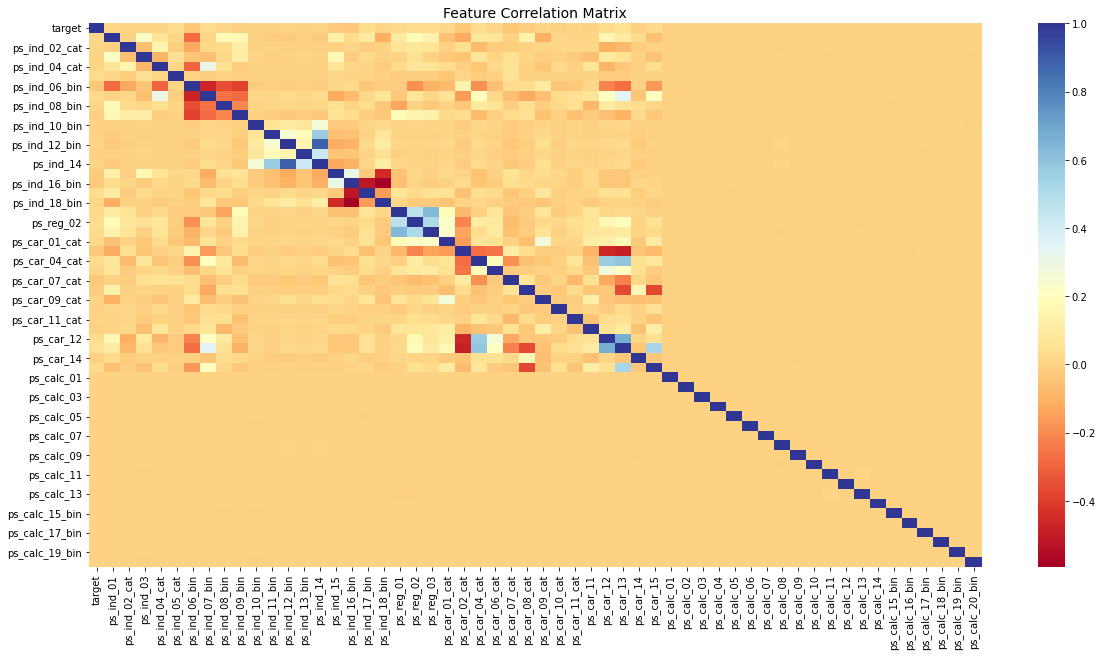

In [ ]:
#correlação das variáveis
fig, ax = plt.subplots(figsize=(20,10)) 
corrmat = df.corr()
sns.heatmap(corrmat, cmap='RdYlBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

Ruim de visualizar os impactos porque (1) há baixo impacto e as cores são parecidas e (2) há muitas variáveis. No entanto, podemos ver que _calc não aparenta ter qualquer relação com qualquer variável, sendo cadidata ao drop.

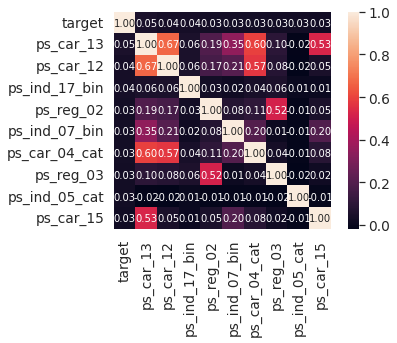

In [ ]:
#target correlation matrix

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Resampling

In [ ]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [11]:
labels = df.columns[1:]

X = df[labels]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Usando SMOTE resampler

In [12]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=7).fit_resample(X,y)
Counter(y_resampled)

Counter({0: 573518, 1: 573518})

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [ ]:
X_train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
526081,1,2,8,1,0,0,0,1,0,0,0,0,0,0,4,1,0,0,0.900000,0.500000,0.821584,10,0,0,14,1,1,0,1,68,3,0.447214,0.699158,0.427200,2.000000,0.300000,0.300000,0.300000,1,2,9,5,9,2,12,4,1,3,7,1,1,1,0,0,0
932410,3,4,8,1,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0.512982,0.000000,0.771507,11,1,0,1,1,1,2,1,64,3,0.316228,0.631625,0.354698,3.043771,0.293509,0.193509,0.735497,2,2,8,3,7,3,10,5,2,2,4,0,0,0,0,0,0
278287,0,2,0,1,-1,0,0,0,1,0,0,0,0,0,8,1,0,0,0.900000,0.500000,0.977880,11,1,0,0,-1,1,2,1,39,3,0.316070,0.711955,-1.000000,3.162278,0.200000,0.200000,0.300000,2,3,8,3,9,3,8,4,1,6,3,0,1,1,1,0,1
774279,0,1,2,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0.900000,0.497524,-0.276492,11,0,0,2,1,1,2,1,104,2,0.441505,0.933289,0.392446,3.311944,0.397524,0.651238,0.597524,3,2,6,3,9,3,9,9,1,0,3,0,0,0,0,0,0
177316,3,1,7,1,0,0,1,0,0,0,0,0,0,0,9,0,0,1,0.000000,0.000000,1.043731,6,1,0,6,1,1,0,1,27,2,0.374166,0.752613,0.390768,3.464102,0.500000,0.700000,0.100000,4,1,8,4,10,3,11,4,1,3,13,0,1,0,0,1,0


In [14]:
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)


In [15]:
df_resampled = pd.concat((X_resampled,y_resampled), axis = 1)
df_resampled.shape

(1147036, 56)

In [ ]:
df_resampled.head(30)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,0
1,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,0
2,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0,0
3,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0,0
5,5,1,4,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10,0,0,14,1,1,0,1,104,2,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1,0
6,2,1,3,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6,1,0,11,1,1,0,1,99,2,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0,0
7,5,1,4,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,11,1,0,11,1,1,2,1,30,3,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,0,0
8,5,1,3,1,0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,10,1,0,14,1,1,0,1,68,3,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1,0
9,1,1,2,0,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,11,0,1,14,1,1,2,1,104,2,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0,1


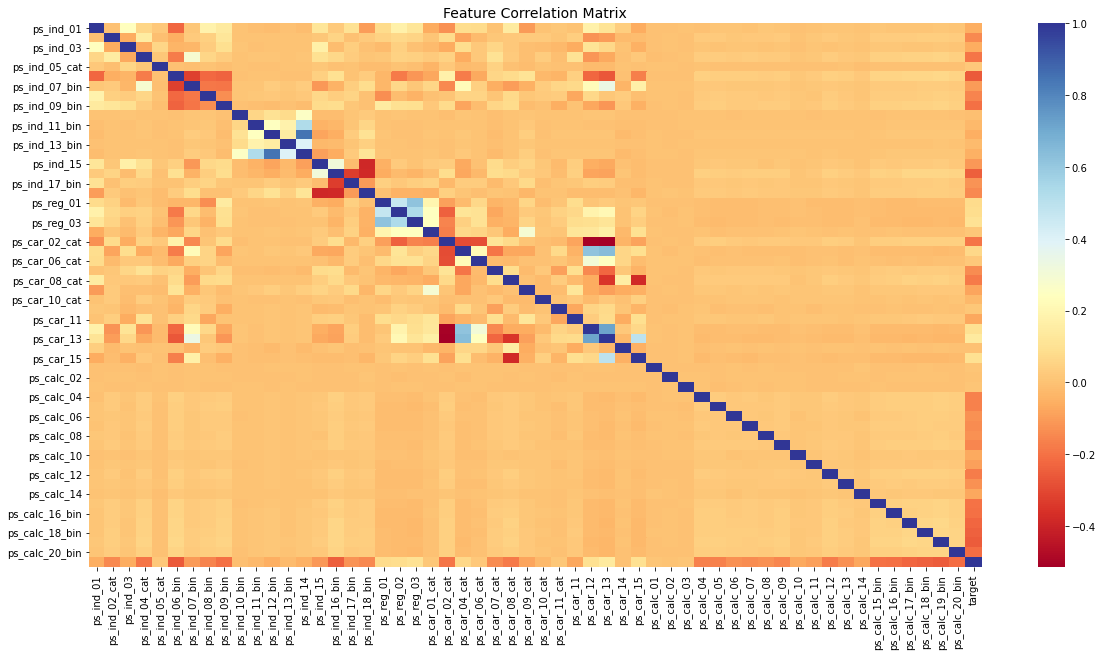

In [ ]:
#correlação das variáveis 
fig, ax = plt.subplots(figsize=(20,10)) 
corrmat = df_resampled.corr()
sns.heatmap(corrmat, cmap='RdYlBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

Agora que a base está balanceada, _cal afeta target

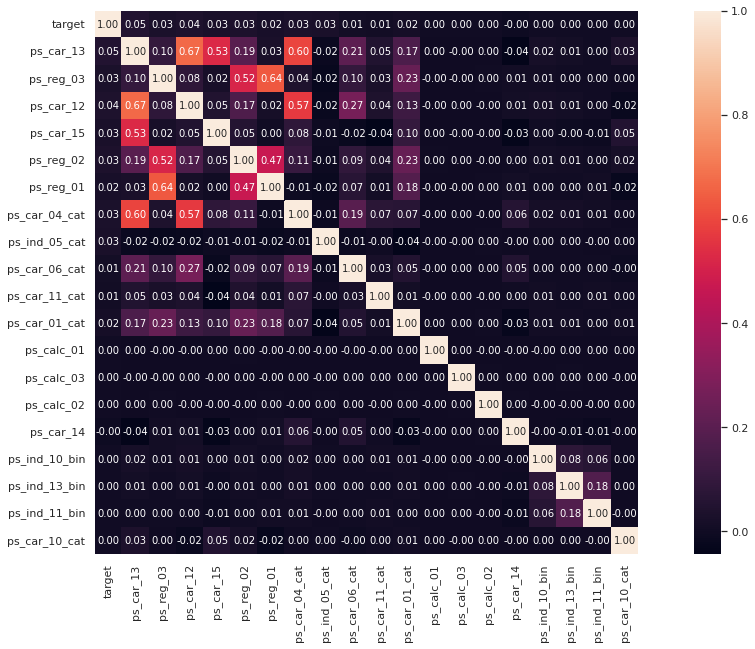

In [ ]:
#target correlation matrix
plt.rcParams['figure.figsize'] = [20, 10]

k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

feature engineering

In [16]:
## filling NAN das categoricas com mode

df_resampled['ps_car_01_cat'].fillna((df['ps_car_01_cat'].mode()), inplace=True)
df_resampled['ps_car_02_cat'].fillna((df['ps_car_02_cat'].mode()), inplace=True)
df_resampled['ps_car_04_cat'].fillna((df['ps_car_04_cat'].mode()), inplace=True)
df_resampled['ps_car_06_cat'].fillna((df['ps_car_06_cat'].mode()), inplace=True)
df_resampled['ps_car_08_cat'].fillna((df['ps_car_08_cat'].mode()), inplace=True)
df_resampled['ps_car_09_cat'].fillna((df['ps_car_09_cat'].mode()), inplace=True)
df_resampled['ps_car_10_cat'].fillna((df['ps_car_10_cat'].mode()), inplace=True)
df_resampled['ps_car_11_cat'].fillna((df['ps_car_11_cat'].mode()), inplace=True)
df_resampled['ps_ind_02_cat'].fillna((df['ps_ind_02_cat'].mode()), inplace=True)
df_resampled['ps_ind_04_cat'].fillna((df['ps_ind_04_cat'].mode()), inplace=True)
df_resampled['ps_ind_05_cat'].fillna((df['ps_ind_05_cat'].mode()), inplace=True)

In [17]:
## filling NAN das binarias com mode

df_resampled['ps_calc_15_bin'].fillna((df['ps_calc_15_bin'].mode()), inplace=True)
df_resampled['ps_calc_16_bin'].fillna((df['ps_calc_16_bin'].mode()), inplace=True)
df_resampled['ps_calc_17_bin'].fillna((df['ps_calc_17_bin'].mode()), inplace=True)
df_resampled['ps_calc_18_bin'].fillna((df['ps_calc_18_bin'].mode()), inplace=True)
df_resampled['ps_calc_19_bin'].fillna((df['ps_calc_19_bin'].mode()), inplace=True)
df_resampled['ps_calc_20_bin'].fillna((df['ps_calc_20_bin'].mode()), inplace=True)
df_resampled['ps_ind_16_bin'].fillna((df['ps_ind_16_bin'].mode()), inplace=True)
df_resampled['ps_ind_17_bin'].fillna((df['ps_ind_17_bin'].mode()), inplace=True)
df_resampled['ps_ind_18_bin'].fillna((df['ps_ind_18_bin'].mode()), inplace=True)

In [18]:
df_resampled['ps_calc_01'].fillna((df['ps_calc_01'].median()), inplace=True)
df_resampled['ps_calc_02'].fillna((df['ps_calc_02'].median()), inplace=True)
df_resampled['ps_calc_03'].fillna((df['ps_calc_03'].median()), inplace=True)
df_resampled['ps_calc_04'].fillna((df['ps_calc_04'].median()), inplace=True)
df_resampled['ps_calc_05'].fillna((df['ps_calc_05'].median()), inplace=True)
df_resampled['ps_calc_06'].fillna((df['ps_calc_06'].median()), inplace=True)
df_resampled['ps_calc_07'].fillna((df['ps_calc_07'].median()), inplace=True)
df_resampled['ps_calc_08'].fillna((df['ps_calc_08'].median()), inplace=True)
df_resampled['ps_calc_09'].fillna((df['ps_calc_09'].median()), inplace=True)
df_resampled['ps_calc_10'].fillna((df['ps_calc_10'].median()), inplace=True)
df_resampled['ps_calc_11'].fillna((df['ps_calc_11'].median()), inplace=True)
df_resampled['ps_calc_12'].fillna((df['ps_calc_12'].median()), inplace=True)
df_resampled['ps_calc_13'].fillna((df['ps_calc_13'].median()), inplace=True)
df_resampled['ps_calc_14'].fillna((df['ps_calc_14'].median()), inplace=True)

df_resampled['ps_ind_07_bin'].fillna((df['ps_ind_07_bin'].median()), inplace=True)
df_resampled['ps_ind_08_bin'].fillna((df['ps_ind_08_bin'].median()), inplace=True)
df_resampled['ps_ind_09_bin'].fillna((df['ps_ind_09_bin'].median()), inplace=True)
df_resampled['ps_ind_10_bin'].fillna((df['ps_ind_10_bin'].median()), inplace=True)
df_resampled['ps_ind_11_bin'].fillna((df['ps_ind_11_bin'].median()), inplace=True)
df_resampled['ps_ind_12_bin'].fillna((df['ps_ind_12_bin'].median()), inplace=True)
df_resampled['ps_ind_13_bin'].fillna((df['ps_ind_13_bin'].median()), inplace=True)
df_resampled['ps_ind_14'].fillna((df['ps_ind_14'].median()), inplace=True)
df_resampled['ps_ind_15'].fillna((df['ps_ind_15'].median()), inplace=True)
df_resampled['ps_reg_01'].fillna((df['ps_reg_01'].median()), inplace=True)
df_resampled['ps_reg_02'].fillna((df['ps_reg_02'].median()), inplace=True)

In [19]:
## filling NAN das contínuas com mean
df_resampled['ps_reg_03'].fillna((df['ps_reg_03'].mean()), inplace=True)
df_resampled['ps_car_12'].fillna((df['ps_car_12'].mean()), inplace=True)
df_resampled['ps_car_13'].fillna((df['ps_car_13'].mean()), inplace=True)
df_resampled['ps_car_14'].fillna((df['ps_car_14'].mean()), inplace=True)
df_resampled['ps_car_15'].fillna((df['ps_car_15'].mean()), inplace=True)

In [ ]:
#normalization as "outras"
#z-score

#from scipy.stats import zscore
#df_resampled[''] = zscore(df_resampled[''])



In [20]:
# Removendo outliers
#Dropping the outlier rows with standard deviation
n=3

for label, content in df_resampled.items():
   upper_limit = df_resampled[label].mean() + n*df_resampled[label].std () 
   lower_limit = df_resampled[label].mean() - n*df_resampled[label].std ()

dft = df_resampled[(df_resampled[label] < upper_limit) & 
                   (df_resampled[label] > lower_limit)]

modelando

In [21]:
dft=dft.loc[:,::-1]
dft.head()

,target,ps_calc_20_bin,ps_calc_19_bin,ps_calc_18_bin,ps_calc_17_bin,ps_calc_16_bin,ps_calc_15_bin,ps_calc_14,ps_calc_13,ps_calc_12,ps_calc_11,ps_calc_10,ps_calc_09,ps_calc_08,ps_calc_07,ps_calc_06,ps_calc_05,ps_calc_04,ps_calc_03,ps_calc_02,ps_calc_01,ps_car_15,ps_car_14,ps_car_13,ps_car_12,ps_car_11,ps_car_11_cat,ps_car_10_cat,ps_car_09_cat,ps_car_08_cat,ps_car_07_cat,ps_car_06_cat,ps_car_04_cat,ps_car_02_cat,ps_car_01_cat,ps_reg_03,ps_reg_02,ps_reg_01,ps_ind_18_bin,ps_ind_17_bin,ps_ind_16_bin,ps_ind_15,ps_ind_14,ps_ind_13_bin,ps_ind_12_bin,ps_ind_11_bin,ps_ind_10_bin,ps_ind_09_bin,ps_ind_08_bin,ps_ind_07_bin,ps_ind_06_bin,ps_ind_05_cat,ps_ind_04_cat,ps_ind_03,ps_ind_02_cat,ps_ind_01
0,0,1,0,0,1,1,0,8,5,1,9,5,1,10,1,10,1,3,0.2,0.5,0.6,3.605551,0.370810,0.883679,0.400000,2,12,1,0,0,1,4,0,1,10,0.718070,0.2,0.7,0,1,0,11,0,0,0,0,0,0,0,1,0,0,1,5,2,2
1,0,0,1,0,1,1,0,9,1,1,3,7,1,8,5,9,1,2,0.3,0.1,0.3,2.449490,0.388716,0.618817,0.316228,3,19,1,2,1,1,11,0,1,11,0.766078,0.4,0.8,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,7,1,1
2,0,0,1,0,1,1,0,7,7,2,4,7,2,8,1,9,2,2,0.1,0.7,0.5,3.316625,0.347275,0.641586,0.316228,1,60,1,2,1,1,14,0,1,7,-1.000000,0.0,0.0,0,0,1,12,0,0,0,0,0,0,1,0,0,0,1,9,4,5
3,0,0,0,0,0,0,0,9,4,2,2,2,4,8,1,7,4,2,0.1,0.9,0.6,2.000000,0.294958,0.542949,0.374166,1,104,1,3,1,1,11,0,1,7,0.580948,0.2,0.9,0,0,1,8,0,0,0,0,0,0,0,0,1,0,0,2,1,0
4,0,0,1,1,0,0,0,3,1,1,3,12,2,10,3,6,2,2,0.0,0.6,0.4,2.000000,0.365103,0.565832,0.316070,3,82,1,2,1,1,14,0,1,11,0.840759,0.6,0.7,0,0,1,9,0,0,0,0,0,0,0,0,1,0,1,0,2,0


In [22]:
#separando
labels = dft.columns[1:]

X = dft[labels]
y = dft['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
#Acurácia
from sklearn.metrics import accuracy_score, confusion_matrix

dt = sk_tree.DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 68.13%


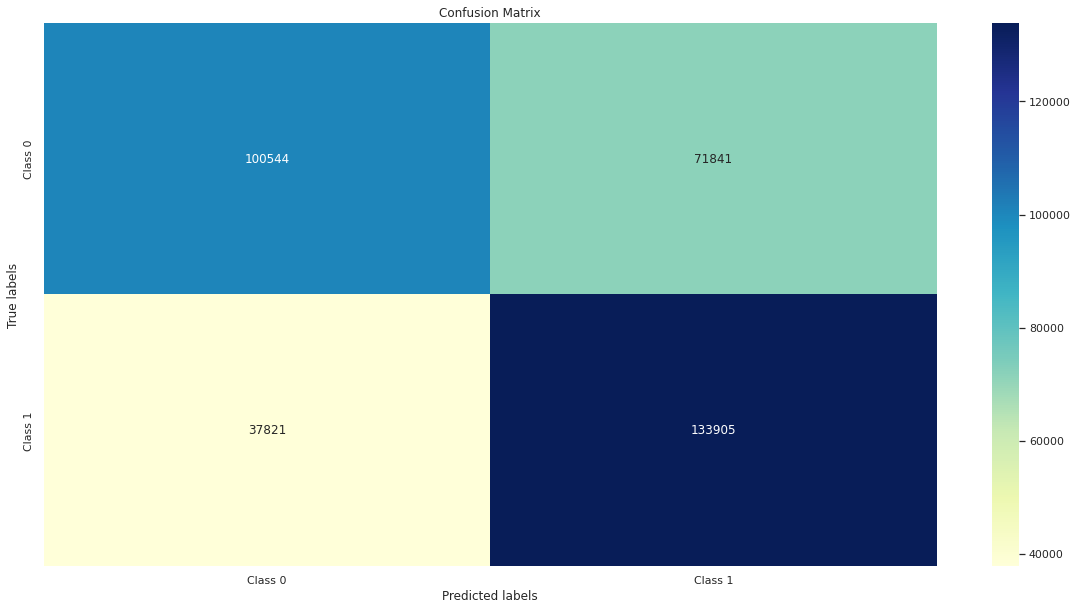

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

labels = ["Class 0", "Class 1"]

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 

#labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [25]:
from sklearn.linear_model import LogisticRegression
logir = LogisticRegression()
logir.fit(X_train, y_train)
y_pred = logir.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.87%


random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, max_depth = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.07%


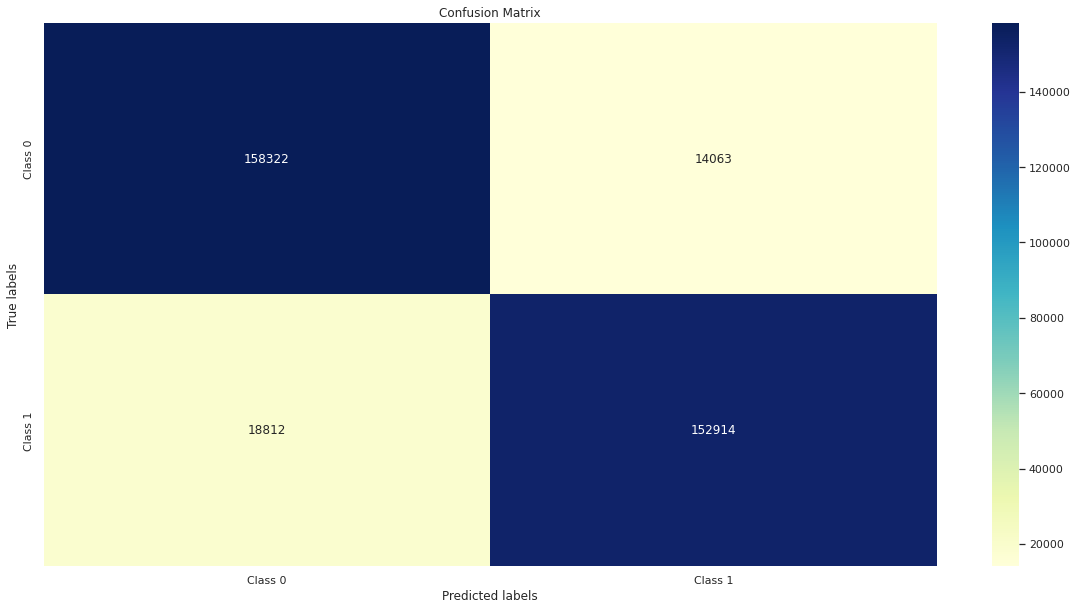

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

labels = ["Class 0", "Class 1"]

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

Adaboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state= 7)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.40%


blending

In [30]:
from mlxtend.regressor import StackingCVRegressor

stack_gen = StackingCVRegressor(regressors=(dt, logir, rf, ada),
                                meta_regressor = logir,
                                use_features_in_secondary=True)

In [31]:
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

dt_model_full_data = dt.fit(X, y)

logir_model_full_data = logir.fit(X, y)

rf_model_full_data = rf.fit(X, y)

ada_model_full_data = ada.fit(X, y)

KeyboardInterrupt: ignored

In [ ]:
from sklearn import datasets, linear_model

x_model = ["stack_gen_model","dt_model_full_data","logir_model_full_data","rf_model_full_data","ada_model_full_data"]
lreg = linear_model.LinearRegression()
lreg.fit(x_model,y_train)

y_pred = lreg.predict(X_test)


# Coeficientes
print("Coeficientes: \n", lreg.coef_)

In [ ]:
def blend_models_predict(X):
    return ((0.1 * dt_model_full_data.predict(X)) +\
            (0.20 * logir_model_full_data.predict(X)) + \
            (0.15 * rf_model_full_data.predict(X)) + \
            (0.25 * ada_model_full_data.predict(X)) + \
            (0.4 * stack_gen_model.predict(np.array(X))))
